# **Introduction:**

* Gradient Boosting has similar idea of adaboost, where weak learners are created in series to produce a strong ensembled model.

* It makes use of the (residual) error between actual and predicted values.

* Each weak learner (decision tree) in gradient boosting is trained to correct the mistakes of the previous weak learners **by focusing on the differences between the predicted and actual values.** It aims to minimize the errors by updating the ensemble **in the direction of the steepest descent** using gradient descent optimization.




# **Gradient Boosting vs Adaboosting:**

1.  In AdaBoost, each weak learner **focuses on one feature at a time** (often referred to as "decision stumps"), sequentially improving the classification based on the selected features.

  On the other hand, in Gradient Boosting, each weak learner is trained to correct the mistakes of the previous learners by fitting the residuals, which involves **considering all features collectively**.


2. **Larger trees allowed in Gradient Boosting**. As we know GB uses all features collectively, so it make larger decision trees that consider multiple features simultaneously to capture complex patterns and improve model performance.

  On the other hand, in AdaBoost, it focuses mainly on one feature at a time, so having 1000 features means having 1000 stumps,making one by one by one. ugh! So it is good on smaller datasets.

3. Adaboost uses weight coefficients which gets updated with each iteration, while gradient boosting has learning coefficient that remains same for all the features throughout the training.

4. Gradient boosting do its learning based on the residuals of the previous model, which adaboost do its learning based on misclassified datapoints of the previous model.

# **Process:**

1. We have the following data and we have to predict price of the house as y:

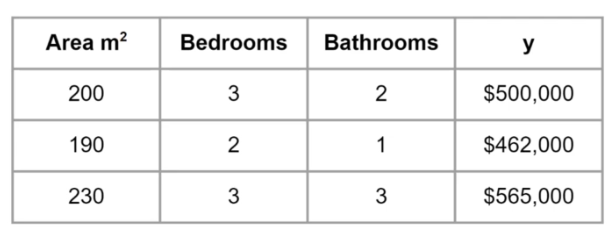

2. **DT 1:** Make first decision tree. Calculate its prediction as ŷ.

3. Calculate the error: e = y - ŷ.

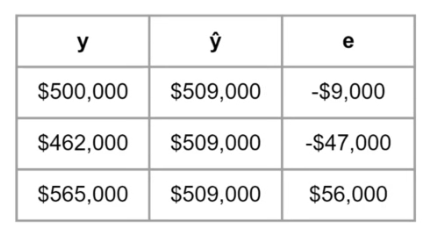




3. **DT 2:** Now we will make next decision treE WHICH WILL FOCUS ON REDUCING THIS RESIDUAL ERROR (not the target label y). So, this second decision tree will produce error, we will call it as f1. This will be calculated using the original features but target will be **e**.

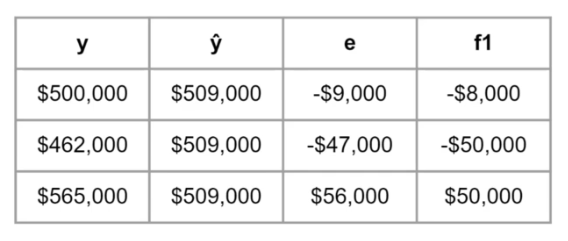



Now, combine this DT2 output with DT1.

New Target = Prediction of Previous Tree **+** Error of current tree **x** Learning rate

New Target  = F1 = ŷ + f1 * LR

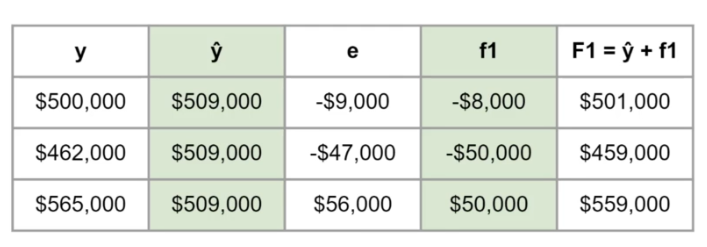

Now calculate the ensemled error:

Ensembled Error = e1 = y - F1

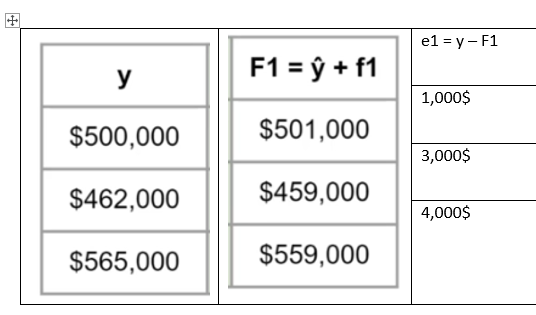

Now, next Decision tree will try to predict this new Ensembled Error F1.


So, this procedure will be continued till we get the best performance or error stops reducing.

**For the Classification task,**

We use logit as an error metric:

  ŷ = log(p̂ / 1-p̂)

Here, p̂ = 1 / (1+ $e^{-ŷ}$)


Just remember, the learning rate is between 0 and 1. Smaller learning rate, it will take more time to converge to most reduced error AND GONNA TAKE MORE TRAINING TIME.

The trade-off in Gradient boosting is Training Time.

# **----------------------- Coding -----------------------**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/content/sample_data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
X = pd.get_dummies(df.drop('class', axis=1), drop_first=True)
y = df['class']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100],
              'learning_rate': [0.1, 0.05, 0.2],
              'max_depth': [3,4,5]}


grid_model = GridSearchCV(model, param_grid)

grid_model.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [10]:
predictions = grid_model.predict(X_test)

In [11]:
predictions

array(['e', 'p', 'e', ..., 'e', 'e', 'e'], dtype=object)

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1384
           p       1.00      1.00      1.00      1297

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [20]:
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [15]:
grid_model.best_estimator_.feature_importances_

array([0.00000000e+00, 7.92752952e-18, 5.89109404e-18, 0.00000000e+00,
       9.85286909e-19, 9.20327867e-04, 5.02981240e-07, 3.14249098e-16,
       5.93222740e-06, 4.06796748e-18, 0.00000000e+00, 0.00000000e+00,
       5.67664345e-17, 0.00000000e+00, 0.00000000e+00, 1.58225376e-06,
       1.58953120e-03, 3.78133812e-02, 1.03040637e-03, 6.47970525e-03,
       1.89490313e-02, 4.14709532e-05, 6.18830872e-01, 1.11441646e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.59619326e-03,
       6.58842453e-03, 0.00000000e+00, 9.27404954e-18, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.48925924e-18, 0.00000000e+00, 2.72180844e-16, 0.00000000e+00,
       1.87004772e-03, 2.15511847e-04, 1.51135704e-01, 3.97926741e-03,
       3.19548995e-02, 2.51400137e-03, 5.73565450e-09, 8.42685095e-06,
       0.00000000e+00, 0.00000000e+00, 4.33119613e-02, 1.38451866e-03,
       0.00000000e+00, 0.00000000e+00, 5.85270971e-06, 0.00000000e+00,
      

In [18]:
feats = pd.DataFrame(data = grid_model.best_estimator_.feature_importances_,  index = X.columns, columns = ['Feature Importance']).sort_values(by = 'Feature Importance', ascending = False)

imp_feats = feats[feats['Feature Importance'] > 0.0005]

imp_feats

,Feature Importance
odor_n,0.618831
stalk-root_c,0.151136
stalk-surface-below-ring_y,0.043312
bruises_t,0.037813
spore-print-color_r,0.034904
stalk-root_r,0.031955
odor_l,0.018949
gill-spacing_w,0.009596
spore-print-color_h,0.008197
gill-size_n,0.006588


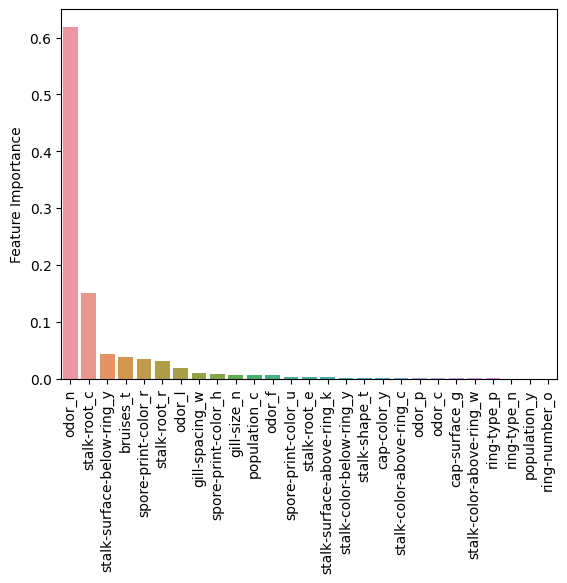

In [19]:
sns.barplot(data = imp_feats, x = imp_feats.index, y = 'Feature Importance')
plt.xticks(rotation=90);